<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Working with multiple records

## Authors

Jordan Landers1

1 Department of Earth Sciences, University of Southern California

Author1 = {"name": "Jordan Landers", "affiliation": "Department of Earth Sciences, University of Southern
California", "email": "lplander@usc.edu", "orcid": "0000-0001-9772-7617"}

## Preamble

### Introduction:
In many cases we are interested in looking at, and thinking about multiple time series at the same. Here we
introduce the `MultipleSeries` object, which serves as the basis of the various analysis techniques that apply
specifically to analyzing and visualizing multiple `Series`. We also look at the `EnsembleSeries`, a child class of `MultipleSeries` that addresses sets of traces produced by ensemble models. 

### Goals:

* Learn to create a `MultipleSeries` and work with `common_time()`
* Learn to create and tune a stackplot
* Learn to create an `EnsembleSeries`
* Learn to visualize an `EnsembleSeries`


**Reading Time:**

10 minutes

### Keywords
Visualization, Ensemble models, Multiple Records

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Xarray

## Data Description

* Euro2k database: PAGES2k Consortium., Emile-Geay, J., McKay, N. et al. A global multiproxy database for temperature reconstructions of the Common Era. Sci Data 4, 170088 (2017). https://doi.org/10.1038/sdata.2017.88

## Demonstration
First we import our favorite package:

In [1]:
import pyleoclim as pyleo

### MultipleSeries

#### Load a sample dataset
For more details on working with LiPD files, read the []() tutorial.  Briefly, below we load the LiPD files located in
 the _Euro2k_ directory and then create a list of those records taken from corals.

In [2]:
d_euro = pyleo.Lipd('../data/Euro2k')

Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 31 LiPD file(s)
reading: Ocn-RedSea.Felis.2000.lpd
reading: Arc-Forfjorddalen.McCarroll.2013.lpd
reading: Eur-Tallinn.Tarand.2001.lpd
reading: Eur-CentralEurope.Dobrovoln.2009.lpd
reading: Eur-EuropeanAlps.Bntgen.2011.lpd
reading: Eur-CentralandEasternPyrenees.Pla.2004.lpd
reading: Arc-Tjeggelvas.Bjorklund.2012.lpd
reading: Arc-Indigirka.Hughes.1999.lpd
reading: Eur-SpannagelCave.Mangini.2005.lpd
reading: Ocn-AqabaJordanAQ19.Heiss.1999.lpd
reading: Arc-Jamtland.Wilson.2016.lpd
reading: Eur-RAPiD-17-5P.Moffa-Sanchez.2014.lpd
reading: Eur-LakeSilvaplana.Trachsel.2010.lpd
reading: Eur-NorthernSpain.Martn-Chivelet.2011.lpd
reading: Eur-MaritimeFrenchAlps.Bntgen.2012.lpd
reading: Ocn-AqabaJordanAQ18.Heiss.1999.lpd
reading: Arc-Tornetrask.Melvin.2012.lpd
reading: Eur-EasternCarpathianMountains.Popa.2008.lpd
reading: Arc-PolarUrals.Wilson.2015.lpd
reading: Eur-LakeSilvaplana.Larocque-Tobler.2010.lpd
reading: Eur

In [3]:
ts_list_euro = d_euro.to_tso()
indices = []
for idx, item in enumerate(ts_list_euro):
    if 'archiveType' in item.keys(): #check that it is available to avoid errors on the loop
        if item['archiveType'] == 'coral': #if it's a coral, then proceed to the next step
            if item['paleoData_variableName'] in ['d13C','d18O']:
                indices.append(idx)

ts_list_euro_coral =[]

for i in indices:
    ts_list_euro_coral.append(pyleo.LipdSeries(ts_list_euro[i]))


extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

To create a `pyleo.MultipleSeries`, simply pass a collection of `pyleo.Series` objects. (In this case, we are passing a
list
 of
`pyleo.LipdSeries`, which works because a `pyleo.LipdSeries` is a special type of `pyleo.Series`.)

In [4]:
ms_euro_coral = pyleo.MultipleSeries(ts_list_euro_coral, name='European Coral')

There are a number of useful methods available to quickly learn about our set of records.
For example, `.equal_length()` is a quick way to see if the records are the same length.

In [5]:
ms_euro_coral.equal_lengths()


(False, [1468, 107, 107, 205, 205])

`.equal_length()` usefully returns a `True`/`False` the length of each record. In this case, they are not, which we
can visualize by plotting them using `.stackplot()`.

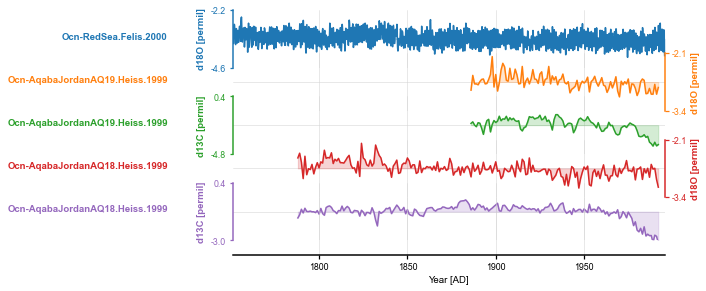

In [6]:
fig, ax = ms_euro_coral.stackplot()


If we wanted to place the records on a shared time axis with a common sampling frequency and focus on the interval shared by all
records in the `MultipleSeries`, we could apply `.common_time()`.

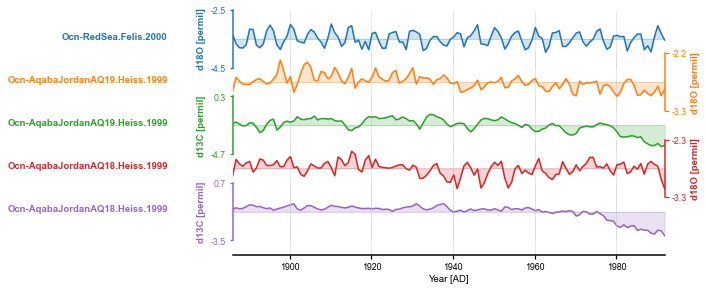

In [7]:
ms_euro_coral_ct = ms_euro_coral.common_time()
fig, ax = ms_euro_coral_ct.stackplot()

By default, `.common_time()` interpolates and infers spacing from the records involved and returns a `MultipleSeries` that spans the full shared interval. However, these parameters can be tuned. For example, in addition to interpolation, binning, and a Gaussian kernel are also supported methods. Downsampling is a simple matter of specifying the preferred value for `step`, and focusing in on a subinterval of the shared interval is only a matter of assigning relevant date values to `start` and `stop`. 
 For more information see
 [documentation on `common_time()`](https://pyleoclim-util.readthedocs.io/en/master/core/api.html?highlight=stackplot#pyleoclim.core.multipleseries.MultipleSeries.common_time).


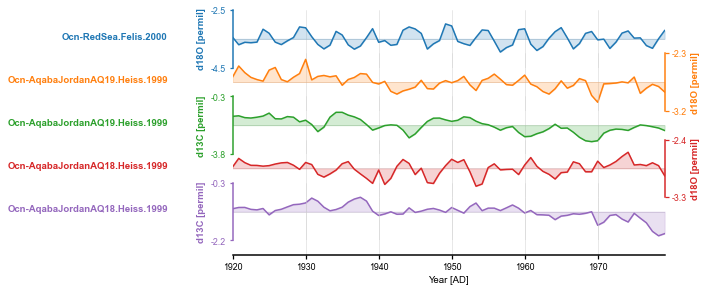

In [8]:
ms_euro_coral_ct = ms_euro_coral.common_time(start=1920, stop=1980)
fig, ax = ms_euro_coral_ct.stackplot()

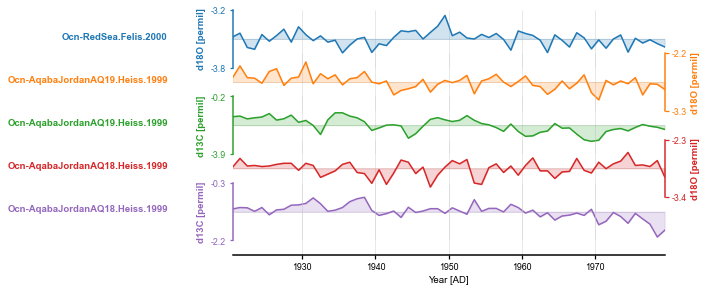

In [9]:
ms_euro_coral_ct = ms_euro_coral.common_time(method = 'bin', step=1, start=1920, stop=1980)
fig, ax = ms_euro_coral_ct.stackplot()

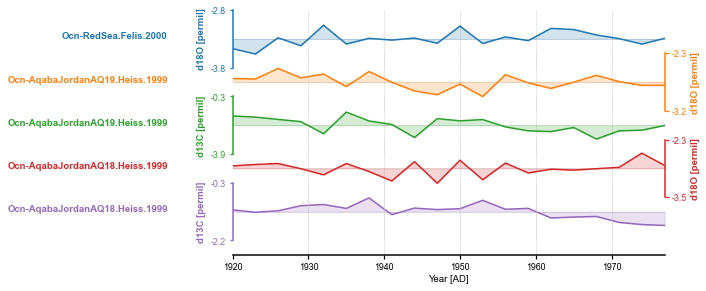

In [10]:
ms_euro_coral_ct = ms_euro_coral.common_time(step=3, start=1920, stop=1980)
fig, ax = ms_euro_coral_ct.stackplot()

#### Tuning a stackplot
##### Labels
The labels attached to each record in the stackplot above are a bit unweildy. To make them a bit more readable, we
can pass a list of labels to `labels`.

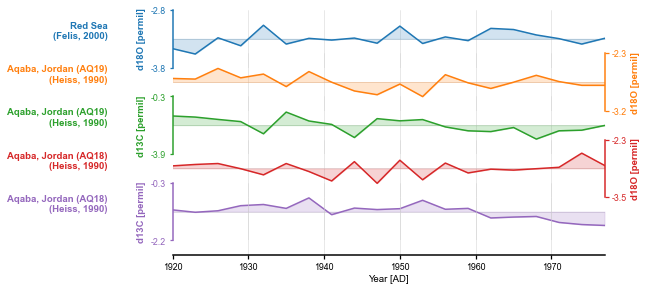

In [11]:
fig, ax = ms_euro_coral_ct.stackplot(labels=['Red Sea\n(Felis, 2000)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)'])



Alternatively, we could remove the labels entirely by setting `labels` to `None`.


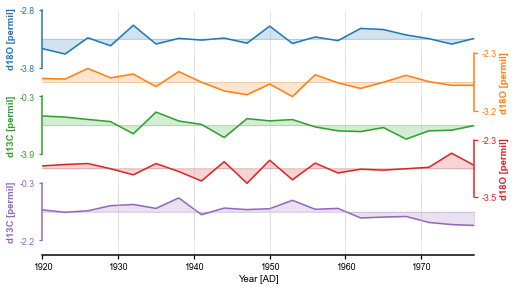

In [12]:
fig, ax = ms_euro_coral_ct.stackplot(labels=None)

##### Color
If we want to change the colors to a set other than the default
([tab10](https://matplotlib.org/stable/tutorials/colors/colormaps.html#qualitative)), we can pass a list of Python
supported color codes (one or more strings of hex code, or tuples of rgba values)) to `colors`. If the list is
shorter than the number of records, the plot will simply cycle through them.

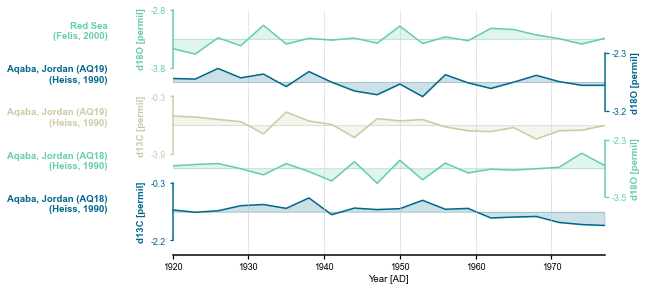

In [13]:
fig, ax = ms_euro_coral_ct.stackplot(labels=['Red Sea\n(Felis, 2000)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)'],
                                                colors=['#66CDAA', '#00688B', '#CDC9A5'])

Alternatively, we can pass a color map and let pyleoclim figure out how to specify the colors. More information about
 color maps is available in this [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
  on the subject. While it is possible to create colormaps from scratch, let's go with `tab20`. (Custom colormaps
  are left as an exercise to the intrepid reader.)


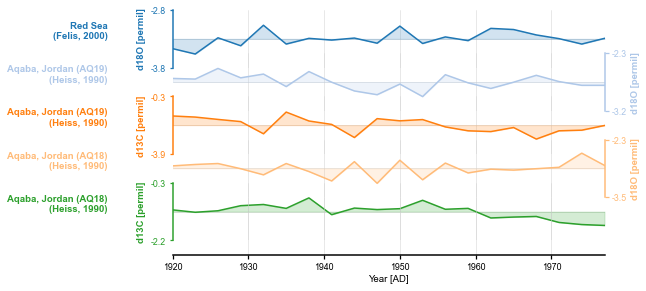

In [14]:
fig, ax = ms_euro_coral_ct.stackplot(labels=['Red Sea\n(Felis, 2000)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)'],
                                                cmap='tab20')

### EnsembleSeries
An `EnsembleSeries` is a special kind of `MultipleSeries`. It is similar in that it is created from a list of
`Series`, but different in that each series is assumed to be output from a model intending to simulate the same variable with the
same initial conditions, rather than independent datasets. By capturing this data in a `pyleo.EnsembleSeries` we can
apply ensemble-specific techniques for analysis and visualzation.

#### Create an `EnsembleSeries` from NetCDF
In this case, we will focus on one variable from `p2k_nc` and create an `EnsembleSeries` from a list of `Series` (one for each trace) for the full set of ensemble runs.

In [15]:
import xarray as xr

In [16]:
file_path = '../data/p2k_ngeo19_recons.nc'
p2k_nc = xr.open_dataset(file_path)
p2k_nc

<xarray.Dataset>
Dimensions:  (year: 2000, ens: 1000)
Coordinates:
  * year     (year) int64 1 2 3 4 5 6 7 8 ... 1994 1995 1996 1997 1998 1999 2000
  * ens      (ens) int64 1 2 3 4 5 6 7 8 9 ... 993 994 995 996 997 998 999 1000
Data variables:
    LMRv2.1  (year, ens) float32 ...
    BHM      (year, ens) float64 ...
    DA       (year, ens) float64 ...
    CPS_new  (year, ens) float64 ...
    CPS      (year, ens) float64 ...
    OIE      (year, ens) float64 ...
    PAI      (year, ens) float64 ...
    PCR      (year, ens) float64 ...
    M08      (year, ens) float64 ...

In [17]:
%%time
variable_name = 'LMRv2.1'
ens_grps = p2k_nc.groupby('ens')
ts_list = []

for im in range(len(p2k_nc.ens)):
    ens_run = ens_grps[im+1].data_vars[variable_name]
    ts_list.append(pyleo.Series(time=p2k_nc.year, value=ens_run,
                      time_name='Time', time_unit='year',
                      value_name='GMST', value_unit='$^{\circ}$C'))


CPU times: user 1.51 s, sys: 33.9 ms, total: 1.55 s
Wall time: 1.56 s


In [18]:
%%time
lmr_ens = pyleo.EnsembleSeries(ts_list)

CPU times: user 15 µs, sys: 1e+03 ns, total: 16 µs
Wall time: 21 µs


#### Plot traces
In some cases, it can be informative to look at a set of individual traces. By default, `.plot_traces()` plots ten traces, but it is simple enough to set `num_traces` to a value of choice.  The traces (however many) are chosen via a random number generator.  Random number generators start from a seed number, so if it is important that the function yields the same plot each time it is rerun, set a value for `seed`.   

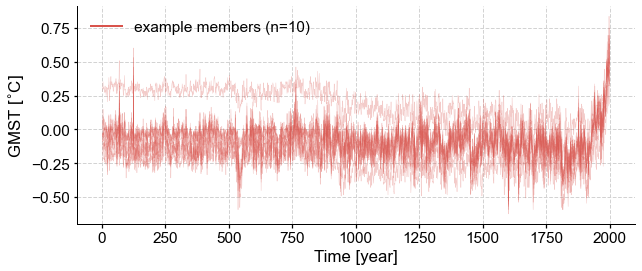

In [19]:
fig, ax = lmr_ens.plot_traces()

#### Plot envelope
Instead of looking at the full set of traces, it can be useful to look at an enevelope that highlights features like the 95% confidence interval, the interquartile range (IQR), and the median. This plot can be customized for a different set of significance levels by passing a list of values to the parameter `qs`, in addition to various color, opacity, line style and label values.  

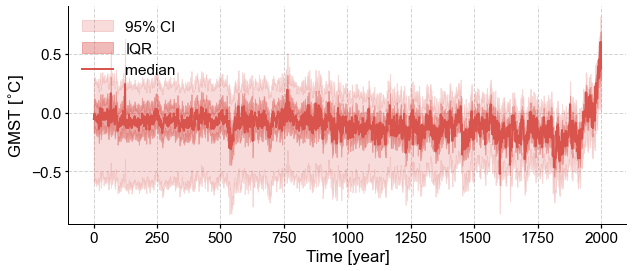

In [20]:
fig, ax = lmr_ens.plot_envelope()

#### Plot distribution
Some analysis methods assume that data have a normal distribution, so running `.distplot()` is a quick way to check whether this requirement is met. 

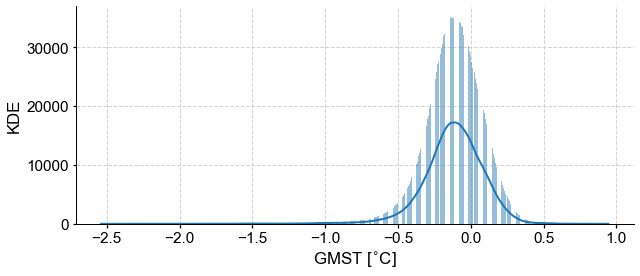

In [21]:
fig, ax = lmr_ens.distplot()
